In [1]:
# Cubic spline interpolation 

the interpolation function is a set of
piecewise cubic functions. Specifically, we assume that the points (xi , yi ) and (xi+1 , yi+1 ) are joined by
a cubic polynomial Si (x) = ai x 3 + bi x 2 + ci x + di that is valid for xi ≤ x ≤ xi+1.
To find the interpolation function, we must first determine the coefficients ai , bi , ci , di for each of
the cubic functions.
For n points, there are n − 1 cubic functions to find, and each cubic function
requires four coefficients. Therefore we have a total of 4(n − 1) unknowns, and so we need 4(n − 1)
independent equations to find all the coefficients.

In Python, we can use SciPy’s function CubicSpline to perform cubic spline interpolation.

    First, the cubic functions must intersect the data the points on the left and the right:
    Si (xi ) = yi ,
    Si (xi+1 ) = yi+1 ,

Next, we want each cubic function to join as smoothly with its
neighbors as possible, so we constrain the splines to have continuous first and second derivatives at the
    data points i = 2, . . . , n − 1:

    Si'(xi+1 ) = Si+1'(xi+1)
    Si''(xi+1 ) = Si+1''(xi+1)

Two more equations are required to compute the coefficients of Si (x). These last two constraints are
arbitrary; they can be chosen to fit the circumstances of the interpolation being performed. A common
set of final constraints is to assume that the second derivatives are zero at the endpoints. This means
that the curve is a “straight line” at the end points. Explicitly,
        
        S1''(x1 ) = 0,
        Sn−1''(xn ) = 0.

In [5]:
from scipy.interpolate import CubicSpline 
import numpy as np
import matplotlib.pyplot as plt

In [59]:
m = [0, 1, 2, 3]
n = [1, 3, 7, 15]

In [60]:
plt.style.use("seaborn-poster")

In [61]:
# use bc_type = "natural" to add the additional two constraints

In [64]:
t = CubicSpline(m, n, bc_type = "natural")
m_new = np.linspace(0, 5, 100)
n_new = t(m_new)

Text(0, 0.5, 'y')

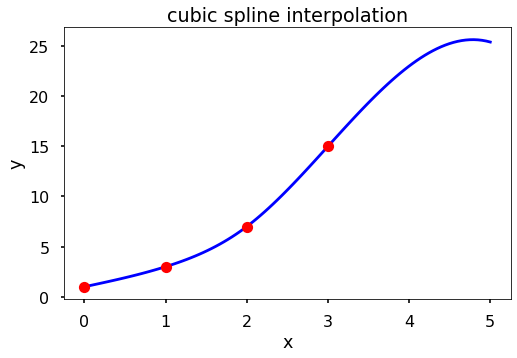

In [65]:
plt.figure(figsize = (8,5))
plt.plot(m_new, n_new, "b")
plt.plot(m, n, "ro")
plt.title("cubic spline interpolation")
plt.xlabel("x")
plt.ylabel("y")